<a href="https://colab.research.google.com/github/tinawong15/portends-greatness/blob/master/new_elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import matplotlib.pyplot as plt

In [0]:
plotly.tools.set_credentials_file(username='raunakchow', api_key='MBOLCsoeY3lkW4dXsAhC')

In [3]:
!git clone https://raunakchowdhury:<p>@github.com/tinawong15/portends-greatness

fatal: destination path 'portends-greatness' already exists and is not an empty directory.


In [4]:
!ls portends-greatness

1976-2016-president.csv		    county_population.csv     pop_density.csv
1980-2014-Gen-Election-Turnout.csv  countypres_2000-2016.csv  README.md
county_population_2.csv		    elections.ipynb
county_population_3.csv		    new_elections.ipynb


In [0]:
csv_path = "portends-greatness/countypres_2000-2016.csv"
# csv_path = os.path.join('countypres_2000-2016.csv') 
df = pd.read_csv(csv_path, sep="\t") 
# df

In [0]:
winners = df.sort_values(['year', 'state', 'county', 'candidatevotes'], ascending=(True, True, True, False)).groupby(['year', 'state', 'county']).head(1)

In [0]:
# winners

In [0]:
counties_vote = winners.sort_values(['state', 'county', 'year'], ascending=(True, True, True))
# counties_vote

In [0]:
counties_vote = counties_vote.drop(["FIPS", "version", "office", "state_po"], axis=1)
# counties_vote

In [0]:
counties_vote["location"] = counties_vote['county'].str.cat(counties_vote['state'], sep=" ")
second_counties_vote = counties_vote.copy()

In [0]:
counties_vote = counties_vote.drop(['state', 'county'], axis=1)
# counties_vote

In [0]:
# counties_vote['order'] = counties_vote.apply(lambda row: (row.year - 2000)//4, axis = 1)

In [0]:
# counties_vote

In [0]:
new_counties_vote = counties_vote.copy()
# new_counties_vote

In [0]:
new_counties_vote["next_vote"] = new_counties_vote.groupby('location')["party"].shift(-1)
# new_counties_vote

In [0]:
new_counties_vote["no_swing"] = new_counties_vote["next_vote"] == new_counties_vote["party"]
# new_counties_vote

In [17]:
swing = new_counties_vote.groupby('location')['no_swing'].apply(lambda x: (x == False).sum()).reset_index(name='count')
swing['swinginess'] = (swing['count'] - 1) / 4
swing = swing.drop(["count"], axis=1)
# swing[swing['location'] == 'Autauga Alabama']
swing.sort_values(['swinginess'], ascending=(True))

,location,swinginess
0,Abbeville South Carolina,0.00
1667,Lewis Idaho,0.00
1668,Lewis Kentucky,0.00
1669,Lewis Missouri,0.00
1670,Lewis New York,0.00
2731,Sullivan Indiana,0.00
1672,Lewis Washington,0.00
1673,Lewis West Virginia,0.00
1675,Lexington South Carolina,0.00
1676,Lexington Virginia,0.00


In [18]:
csv_path = "portends-greatness/1976-2016-president.csv"
data = pd.read_csv(csv_path)
data = data.drop(["state_fips", "notes", "state_cen", "state_ic", "writein", "version", "office"], axis=1)
print(data.shape)
states = data[data['year'] >= 2000]
print(states.shape)

(3740, 7)
(1698, 7)


In [19]:
state_winners = states.sort_values(['year', 'state', 'candidatevotes'], ascending=(True, True, False)).groupby(['year', 'state']).head(1)
state_winners

,year,state,state_po,candidate,party,candidatevotes,totalvotes
2042,2000,Alabama,AL,"Bush, George W.",republican,941173,1666272
2047,2000,Alaska,AK,"Bush, George W.",republican,167398,285560
2055,2000,Arizona,AZ,"Bush, George W.",republican,781652,1532016
2062,2000,Arkansas,AR,"Bush, George W.",republican,472940,921781
2069,2000,California,CA,"Gore, Al",democrat,5861203,10965822
2076,2000,Colorado,CO,"Bush, George W.",republican,883748,1741368
2086,2000,Connecticut,CT,"Gore, Al",democrat,816015,1459525
2093,2000,Delaware,DE,"Gore, Al",democrat,180068,327529
2100,2000,District of Columbia,DC,"Gore, Al",democrat,171923,201894
2106,2000,Florida,FL,"Bush, George W.",republican,2912790,5963110


In [20]:
states_vote = state_winners.sort_values(['state', 'year'], ascending=(True, True))
states_vote

,year,state,state_po,candidate,party,candidatevotes,totalvotes
2042,2000,Alabama,AL,"Bush, George W.",republican,941173,1666272
2411,2004,Alabama,AL,"Bush, George W.",republican,1176394,1883415
2728,2008,Alabama,AL,"McCain, John",republican,1266546,2099819
3079,2012,Alabama,AL,"Romney, Mitt",republican,1255925,2074338
3395,2016,Alabama,AL,"Trump, Donald J.",republican,1318255,2123372
2047,2000,Alaska,AK,"Bush, George W.",republican,167398,285560
2415,2004,Alaska,AK,"Bush, George W.",republican,190889,312598
2732,2008,Alaska,AK,"McCain, John",republican,193841,326197
3083,2012,Alaska,AK,"Romney, Mitt",republican,164676,300495
3400,2016,Alaska,AK,"Trump, Donald J.",republican,163387,318608


In [0]:
new_states_vote = states_vote.copy()
new_states_vote["next_vote"] = new_states_vote.groupby('state')["party"].shift(-1)
new_states_vote["no_swing"] = new_states_vote["next_vote"] == new_states_vote["party"]

In [22]:
swing_states = new_states_vote.groupby('state')['no_swing'].apply(lambda x: (x == False).sum()).reset_index(name='count')
swing_states['swinginess'] = (swing_states['count'] - 1) / 4
swing_states = swing_states.drop(["count"], axis=1)
swing_states.sort_values(['swinginess'], ascending=(True))

,state,swinginess
0,Alabama,0.00
24,Mississippi,0.00
26,Montana,0.00
30,New Jersey,0.00
32,New York,0.00
34,North Dakota,0.00
36,Oklahoma,0.00
37,Oregon,0.00
21,Massachusetts,0.00
39,Rhode Island,0.00


In [23]:
relevant_states = swing_states[swing_states['swinginess']>0]
relevant_states

,state,swinginess
5,Colorado,0.25
9,Florida,0.50
14,Indiana,0.50
15,Iowa,0.75
22,Michigan,0.25
23,Minnesota,0.75
27,Nebraska,0.50
28,Nevada,0.25
29,New Hampshire,0.25
31,New Mexico,0.50


In [24]:
all_states = data.sort_values(['year', 'state', 'candidatevotes'], ascending=(True, True, False)).groupby(['year', 'state']).head(1)
all_states


,year,state,state_po,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,AL,"Carter, Jimmy",democrat,659170,1182850
7,1976,Alaska,AK,"Ford, Gerald",republican,71555,123574
11,1976,Arizona,AZ,"Ford, Gerald",republican,418642,742719
19,1976,Arkansas,AR,"Carter, Jimmy",democrat,498604,767535
23,1976,California,CA,"Ford, Gerald",republican,3882244,7803770
30,1976,Colorado,CO,"Ford, Gerald",republican,584278,1081440
38,1976,Connecticut,CT,"Ford, Gerald",republican,719261,1386355
43,1976,Delaware,DE,"Carter, Jimmy",democrat,122461,235642
50,1976,District of Columbia,DC,"Carter, Jimmy",democrat,137818,168830
55,1976,Florida,FL,"Carter, Jimmy",democrat,1636000,3150631


In [0]:
all_states_vote = all_states.copy()
all_states_vote["next_vote"] = all_states_vote.groupby('state')["party"].shift(-1)

In [26]:
all_states_vote

,year,state,state_po,candidate,party,candidatevotes,totalvotes,next_vote
0,1976,Alabama,AL,"Carter, Jimmy",democrat,659170,1182850,republican
7,1976,Alaska,AK,"Ford, Gerald",republican,71555,123574,republican
11,1976,Arizona,AZ,"Ford, Gerald",republican,418642,742719,republican
19,1976,Arkansas,AR,"Carter, Jimmy",democrat,498604,767535,republican
23,1976,California,CA,"Ford, Gerald",republican,3882244,7803770,republican
30,1976,Colorado,CO,"Ford, Gerald",republican,584278,1081440,republican
38,1976,Connecticut,CT,"Ford, Gerald",republican,719261,1386355,republican
43,1976,Delaware,DE,"Carter, Jimmy",democrat,122461,235642,republican
50,1976,District of Columbia,DC,"Carter, Jimmy",democrat,137818,168830,democrat
55,1976,Florida,FL,"Carter, Jimmy",democrat,1636000,3150631,republican


In [0]:
all_states_vote["no_swing"] = all_states_vote["next_vote"] == all_states_vote["party"]

In [28]:
all_swing_states = all_states_vote.groupby(['state','state_po'])['no_swing'].apply(lambda x: (x == False).sum()).reset_index(name='count')
all_swing_states['swinginess'] = (all_swing_states['count'] - 1) / 10
all_swing_states = all_swing_states.drop(["count"], axis=1)
all_swing_states.sort_values(['swinginess'], ascending=(True))

,state,state_po,swinginess
50,Wyoming,WY,0.0
34,North Dakota,ND,0.0
12,Idaho,ID,0.0
36,Oklahoma,OK,0.0
16,Kansas,KS,0.0
41,South Dakota,SD,0.0
8,District of Columbia,DC,0.0
44,Utah,UT,0.0
1,Alaska,AK,0.0
45,Vermont,VT,0.1


In [0]:
scale = [
    [0.0, 'rgb(242,240,247)'],
    [0.1, 'rgb(218,218,235)'],
    [0.2, 'rgb(188,189,220)'],
    [0.3, 'rgb(158,154,200)'],
    [0.4, 'rgb(117,107,177)'],
    [0.5, 'rgb(84,39,143)']
]

chloro = [go.Choropleth(
    colorscale = scale,
    autocolorscale = False,
    locations = all_swing_states['state_po'],
    z = all_swing_states['swinginess'].astype(float),
    locationmode = 'USA-states',
    # text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Swingibility")
)]

In [0]:
layout = go.Layout(
    title = go.layout.Title(
        text = 'Swinginess by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = chloro, layout = layout)
# py.iplot(fig, filename = 'd3-cloropleth-map')

In [31]:
path = "portends-greatness/1980-2014-Gen-Election-Turnout.csv"
turnout = pd.read_csv(path)
turnout = turnout[turnout['Year'] % 4 == 0]
all_states_vote = all_states_vote[all_states_vote['year'] > 1976]
all_states_vote = all_states_vote[all_states_vote['year'] < 2016]
turnout = turnout.drop([52, 884, 780, 676, 572, 468, 364, 260, 156], axis=0)
turnout = turnout.sort_values(["Year", "Unnamed: 3"], ascending=(True, True))
vep = pd.DataFrame(turnout["Voting-Eligible Population (VEP)"])
vep = vep.reset_index(drop=True)
all_states_vote = all_states_vote.reset_index(drop=True)
all_states_vote = all_states_vote.join(vep)
all_states_vote.rename(columns={'Voting-Eligible Population (VEP)':'vep'}, 
                 inplace=True)
all_states_vote
turnout[turnout["Unnamed: 3"] == "United States"]
vep.shape

(459, 1)

In [32]:
all_states_vote['turnout'] = all_states_vote.apply(lambda row: (row.totalvotes / int((row.vep).replace(',' , ''))), axis = 1)
all_states_vote

,year,state,state_po,candidate,party,candidatevotes,totalvotes,next_vote,no_swing,vep,turnout
0,1980,Alabama,AL,"Reagan, Ronald",republican,654192,1341929,republican,True,"2,726,249",0.492225
1,1980,Alaska,AK,"Reagan, Ronald",republican,86112,158445,republican,True,"270,122",0.586568
2,1980,Arizona,AZ,"Reagan, Ronald",republican,529688,873945,republican,True,"1,890,167",0.462364
3,1980,Arkansas,AR,"Reagan, Ronald",republican,403164,837582,republican,True,"1,610,104",0.520204
4,1980,California,CA,"Reagan, Ronald",republican,4522994,8582938,republican,True,"15,610,966",0.549802
5,1980,Colorado,CO,"Reagan, Ronald",republican,652264,1184450,republican,True,"2,071,959",0.571657
6,1980,Connecticut,CT,"Reagan, Ronald",republican,677210,1406285,republican,True,"2,201,356",0.638827
7,1980,Delaware,DE,"Reagan, Ronald",republican,111252,235668,republican,True,"421,344",0.559324
8,1980,District of Columbia,DC,"Carter, Jimmy",democrat,130231,173889,democrat,True,"470,956",0.369226
9,1980,Florida,FL,"Reagan, Ronald",republican,2046951,3686927,republican,True,"7,088,658",0.520116


In [0]:
last_swing_states = all_swing_states.sort_values(['swinginess'], ascending=(True)).tail(10)['state'].tolist()
last_swing_states
non_swing_states = all_swing_states.sort_values(['swinginess'], ascending=(True)).head(10)['state'].tolist()
non_swing_states

years = [i for i in range(1980, 2016, 4)]

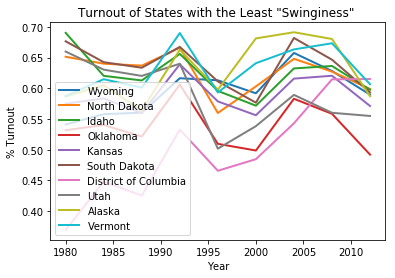

In [34]:
# plotted least swinginess states
plt.figure(0)
for state in non_swing_states:
#     print(all_states_vote[all_states_vote['state'] == state]['turnout'])
    plt.plot(years, all_states_vote[all_states_vote['state'] == state]['turnout'], linewidth=2, markersize=12)
    
plt.title("""Turnout of States with the Least "Swinginess" """)
plt.legend(non_swing_states)
plt.xlabel('Year')
plt.ylabel('% Turnout')
plt.show()

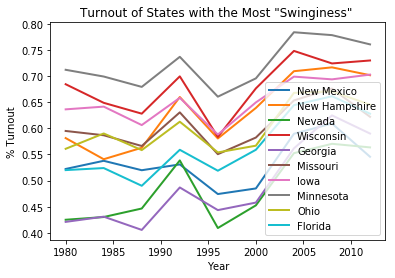

In [35]:
# plotted most swinginess states
plt.figure(1)
for state in last_swing_states:
#     print(all_states_vote[all_states_vote['state'] == state]['turnout'])
    plt.plot(years, all_states_vote[all_states_vote['state'] == state]['turnout'], linewidth=2, markersize=12)
    
plt.title("""Turnout of States with the Most "Swinginess" """)
plt.legend(last_swing_states)
plt.xlabel('Year')
plt.ylabel('% Turnout')
plt.show()

In [36]:
path = "portends-greatness/pop_density.csv"
pop_density = pd.read_csv(path, skiprows=3)
# pop_density = pop_density.drop([0, 9], axis=0)
pop_density

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
2,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
3,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
4,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0
5,California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,...,35.0,31.0,30.0,22.0,15.0,15.0,16.0,14.0,14.0,13.0
6,Colorado,799024,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,...,42.0,41.0,42.0,42.0,42.0,41.0,40.0,40.0,39.0,39.0
7,Connecticut,1114756,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
8,Delaware,202322,223003,238380,266505,318085,446292,548104,594338,666168,...,12.0,12.0,12.0,11.0,11.0,9.0,9.0,9.0,9.0,8.0
9,District of Columbia,331069,437571,486869,663091,802178,763956,756510,638333,606900,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
import random

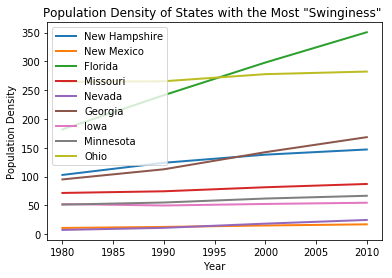

In [44]:
years = [i for i in range(1980, 2011, 10)]
random_swing_states = random.sample(last_swing_states, 9)
plt.figure(1)
for state in random_swing_states:
    values = pop_density[pop_density['STATE_OR_REGION'] == state]["1980_DENSITY"].tolist() + pop_density[pop_density['STATE_OR_REGION'] == state]["1990_DENSITY"].tolist() + pop_density[pop_density['STATE_OR_REGION'] == state]["2000_DENSITY"].tolist() + pop_density[pop_density['STATE_OR_REGION'] == state]["2010_DENSITY"].tolist()
    values = [float(i) for i in values]
    plt.plot(years, values, linewidth=2, markersize=12)
plt.title("""Population Density of States with the Most "Swinginess" """)
plt.legend(random_swing_states)
plt.xlabel('Year')
plt.ylabel('Population Density')
plt.show()

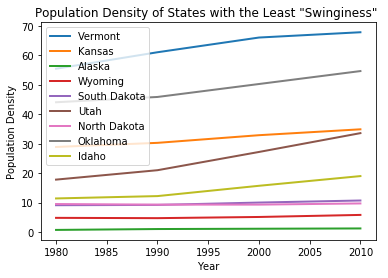

In [45]:
plt.figure(1)
random_swing_states = random.sample(non_swing_states, 10)
random_swing_states.remove("District of Columbia")
for state in random_swing_states:
    values = pop_density[pop_density['STATE_OR_REGION'] == state]["1980_DENSITY"].tolist() + pop_density[pop_density['STATE_OR_REGION'] == state]["1990_DENSITY"].tolist() + pop_density[pop_density['STATE_OR_REGION'] == state]["2000_DENSITY"].tolist() + pop_density[pop_density['STATE_OR_REGION'] == state]["2010_DENSITY"].tolist()
    values = [i.replace(",", "") for i in values]
    values = [float(i) for i in values]
    plt.plot(years, values, linewidth=2, markersize=12)
plt.title("""Population Density of States with the Least "Swinginess" """)
plt.legend(random_swing_states)
plt.xlabel('Year')
plt.ylabel('Population Density')
plt.show()